In [17]:
import os
import random
import fnmatch
import numpy as np
import matplotlib.pyplot as plt

In [18]:
Base_Dir = os.path.join((os.path.expanduser("~")), 'Documents/Visual-Studio/Image-Processing/')
Output_Dir = os.path.join(Base_Dir, 'Outputs')
Connection_Dir = os.path.join(Base_Dir, 'Connectivity', 'MR3trix')

In [41]:
results = { "CONDFT" : [{},{}], "DFT" : [{},{}] }
for category in results:
    for i in range(2):
        checked = False
        while not checked:
            proposal = random.choice(fnmatch.filter(os.listdir(Connection_Dir), category + '*'))
            DTI_path = os.path.join(Output_Dir, proposal)
            MRtrix_path = os.path.join(Connection_Dir, proposal)
            DTI = fnmatch.filter(os.listdir(DTI_path), '*DTI*.nii')
            tck = fnmatch.filter(os.listdir(MRtrix_path), '*.tck')
            csv = fnmatch.filter(os.listdir(MRtrix_path), '*.csv')
            checked = (len(DTI) > 0) & (len(tck) > 0) & (len(csv) > 0)
            if checked: results[category][i] = dict( ID = proposal,
                                                     MRtrix_path = MRtrix_path,
                                                     DTI = os.path.join(DTI_path, DTI[0]), 
                                                     tck = os.path.join(MRtrix_path, tck[0]), 
                                                     csv = os.path.join(MRtrix_path, csv[0]))

## CONDFT
### Imagen DTI  Original

In [23]:
!mrview '{results["CONDFT"][0]["DTI"]}'

In [24]:
!mrview '{results["CONDFT"][1]["DTI"]}'

### Tractografía

In [39]:
!mrview '{results["CONDFT"][0]["DTI"]}' -tractography.load '{results["CONDFT"][0]["tck"]}'

In [40]:
!mrview '{results["CONDFT"][1]["DTI"]}' -tractography.load '{results["CONDFT"][1]["tck"]}'

### Matriz de Conectividad

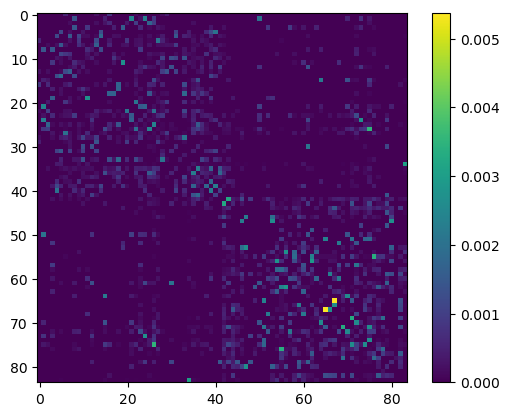

In [28]:
M = np.genfromtxt(results["CONDFT"][0]["csv"], delimiter=',')
fig, ax = plt.subplots()
im = ax.imshow(M, cmap="viridis", interpolation='nearest')
fig.colorbar(im)
plt.savefig(os.path.join(Base_Dir, results["CONDFT"][0]["ID"] + "_matrix.png"))
plt.show()

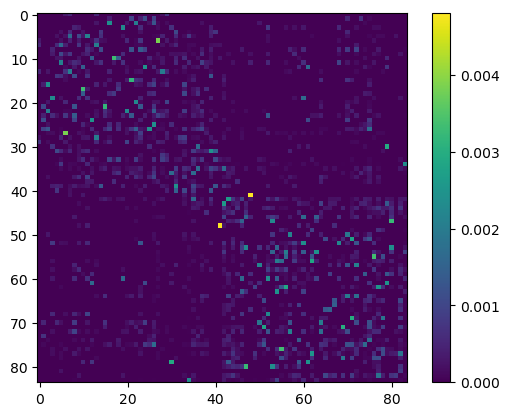

In [29]:
M = np.genfromtxt(results["CONDFT"][1]["csv"], delimiter=',')
fig, ax = plt.subplots()
im = ax.imshow(M, cmap="viridis", interpolation='nearest')
fig.colorbar(im)
plt.savefig(os.path.join(Base_Dir, results["CONDFT"][1]["ID"] + "_matrix.png"))
plt.show()

## DFT
### Imagen DTI Original

In [42]:
!mrview '{results["DFT"][0]["DTI"]}'

In [34]:
!mrview '{results["DFT"][1]["DTI"]}'

### Tractografia

In [43]:
!mrview '{results["DFT"][0]["DTI"]}' -tractography.load '{results["DFT"][0]["tck"]}'

In [36]:
!mrview '{results["DFT"][1]["DTI"]}' -tractography.load '{results["DFT"][1]["tck"]}'

### Matriz de Conectividad

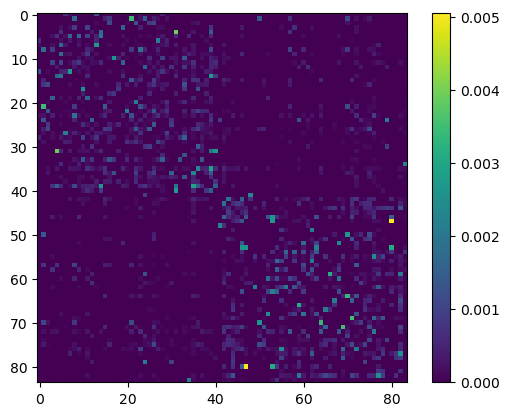

In [44]:
M = np.genfromtxt(results["DFT"][0]["csv"], delimiter=',')
fig, ax = plt.subplots()
im = ax.imshow(M, cmap="viridis", interpolation='nearest')
fig.colorbar(im)
plt.savefig(os.path.join(Base_Dir, results["DFT"][0]["ID"] + "_matrix.png"))
plt.show()

In [ ]:
M = np.genfromtxt(results["DFT"][1]["csv"], delimiter=',')
fig, ax = plt.subplots()
im = ax.imshow(M, cmap="viridis", interpolation='nearest')
fig.colorbar(im)
plt.savefig(os.path.join(Base_Dir, results["DFT"][1]["ID"] + "_matrix.png"))
plt.show()